In [143]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Load the dataset into python environment

In [148]:
data= pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [149]:
data.set_index("PassengerId", inplace = True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [77]:
data.shape

(891, 11)

In [78]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     205 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [81]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
dtype: int64

In [82]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [83]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
dtype: int64

In [84]:
data[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
PassengerId,,,
1,22.0,A6,S
2,38.0,C85,C
3,26.0,NaN,S
4,35.0,C123,S
5,35.0,NaN,S
...,...,...,...
887,27.0,NaN,S
888,19.0,B42,S
889,NaN,NaN,S


>> 1. Age

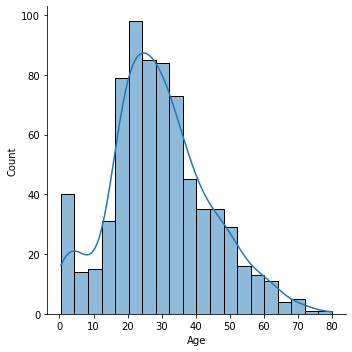

In [85]:
sns.displot(data=data, x="Age", kde=True)

In [86]:
data['Age'].mean()

29.69911764705882

In [87]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Age']

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

In [88]:
data['Age'].isna().sum()

0

In [89]:
data[data['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


>> 2. Cabin

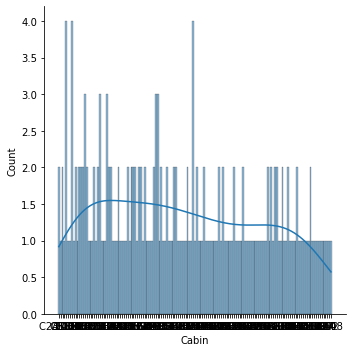

In [90]:
sns.displot(data=data, x="Cabin", kde=True)

In [91]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)
data['Cabin']

PassengerId
1           A6
2          C85
3      B96 B98
4         C123
5      B96 B98
        ...   
887    B96 B98
888        B42
889    B96 B98
890       C148
891    B96 B98
Name: Cabin, Length: 891, dtype: object

In [92]:
data['Cabin'].isna().sum()

0

In [93]:
data[data['Cabin'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


>> 3. Embarked

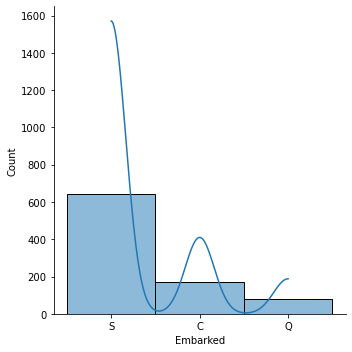

In [94]:
sns.displot(data=data, x="Embarked", kde=True)

In [95]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [96]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data['Embarked']

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [97]:
data['Embarked'].isna().sum()

0

In [98]:
data[data['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [99]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Here , handling outliers in colums "Age" ,"Fare" & "SibSp".

>> 1. Age

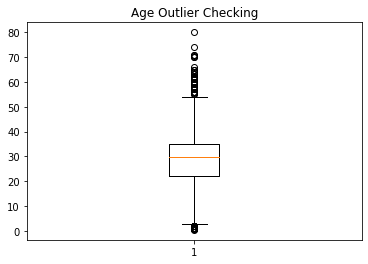

In [100]:
plt.boxplot(data['Age'])   
plt.title('Age Outlier Checking')
plt.show()

In [101]:
data["Age"]

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

In [102]:
Q1_Age = data['Age'].quantile(.25)
Q1_Age

22.0

In [103]:
Q2_Age = data['Age'].quantile(.50)
Q2_Age

29.69911764705882

In [104]:
Q3_Age = data['Age'].quantile(.75)
Q3_Age

35.0

Finding the Interquartile Range

In [105]:
IQR_Age = Q3_Age-Q1_Age
IQR_Age

13.0

Finding lower Limit

In [106]:
low_limit_Age = Q1_Age-1.5*IQR_Age
low_limit_Age

2.5

Finding Upper Limit

In [107]:
up_limit_Age = Q3_Age+1.5*IQR_Age
up_limit_Age

54.5

Finding Outlier Data

In [108]:
Age_outlier= data[(data['Age'] < low_limit_Age ) | (data['Age'] > up_limit_Age )]
Age_outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,B96 B98,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,B96 B98,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,B96 B98,Q
34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,B96 B98,C
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,B96 B98,S


Replacing Outlier Value with Mean Value

In [109]:
outlier_age = (data['Age']<low_limit_Age)
outlier_age = data.loc[outlier_age].index
data.loc[list(outlier_age ),'Age']=data['Age'].mean()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,A6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S


>> 2.Fare

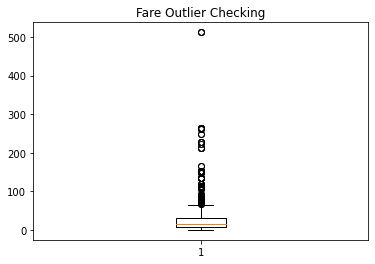

In [110]:
plt.boxplot(data['Fare'])   
plt.title('Fare Outlier Checking')
plt.show()

In [111]:
data["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [112]:
Q1_Fare = data['Fare'].quantile(.25)
Q1_Fare

7.9104

In [113]:
Q2_Fare = data['Fare'].quantile(.50)
Q2_Fare

14.4542

In [114]:
Q3_Fare = data['Fare'].quantile(.75)
Q3_Fare

31.0

Finding the Interquartile Range

In [115]:
IQR_Fare = Q3_Fare-Q1_Fare
IQR_Fare

23.0896

Finding lower Limit

In [116]:
low_limit_Fare = Q1_Fare-1.5*IQR_Fare
low_limit_Fare

-26.724

Finding Upper Limit

In [117]:
up_limit_Fare = Q3_Fare+1.5*IQR_Fare
up_limit_Fare

65.6344

Finding Outlier Data

In [118]:
outlier_Fare= data[(data['Fare'] < low_limit_Fare ) | (data['Fare'] > up_limit_Fare )]
outlier_Fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,B96 B98,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,B96 B98,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,B96 B98,S


Replacing Outlier Value with Mean Value

In [119]:
fare_outlier = (data['Fare']<low_limit_Fare)
fare_outlier = data.loc[fare_outlier].index
data.loc[list(fare_outlier ),'Fare']=data['Fare'].mean()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,A6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S


>> 3. SibSp

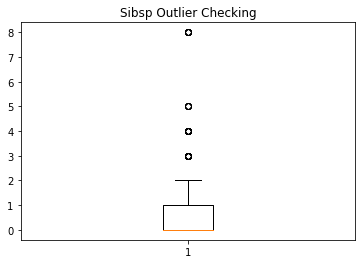

In [120]:
plt.boxplot(data['SibSp'])   
plt.title('Sibsp Outlier Checking')
plt.show()

In [121]:
data["SibSp"]

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

In [122]:
Q1_SibSp = data['SibSp'].quantile(.25)
Q1_SibSp

0.0

In [123]:
Q2_SibSp = data['SibSp'].quantile(.50)
Q2_SibSp

0.0

In [124]:
Q3_SibSp = data['SibSp'].quantile(.75)
Q3_SibSp

1.0

Finding the Interquartile Range

In [125]:
IQR_SibSp = Q3_SibSp-Q1_SibSp
IQR_SibSp

1.0

Finding lower Limit

In [126]:
low_limit_SibSp = Q1_SibSp-1.5*IQR_SibSp
low_limit_SibSp

-1.5

Finding Upper Limit

In [127]:
up_limit_SibSp = Q3_SibSp+1.5*IQR_SibSp
up_limit_SibSp

2.5

Finding Outlier Data

In [128]:
outlier_SibSp= data[(data['SibSp'] < low_limit_SibSp ) | (data['SibSp'] > up_limit_SibSp )]
outlier_SibSp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,29.699118,3,1,349909,21.0750,B96 B98,S
17,0,3,"Rice, Master. Eugene",male,29.699118,4,1,382652,29.1250,B96 B98,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.000000,3,1,349909,21.0750,B96 B98,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,B96 B98,S
60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,B96 B98,S
64,0,3,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,B96 B98,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.000000,4,2,3101281,7.9250,B96 B98,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,B96 B98,S


Replacing Outlier Value with Mean Value

In [129]:
SibSp_outlier = (data['SibSp']<low_limit_SibSp)
SibSp_outlier = data.loc[SibSp_outlier].index
data.loc[list(SibSp_outlier),'SibSp']=data['SibSp'].mean()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,A6,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,B96 B98,S


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [130]:
data.Survived.nunique()

2

In [141]:
data.Survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [132]:
data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

importing the Preprocessing ans Scaler Functions from Sklearn

In [133]:
from sklearn  import preprocessing

In [134]:
scaler =preprocessing. StandardScaler()

In [135]:
Survive_minmax = pd.DataFrame(data['Survived'])

In [136]:
minmaxscale=preprocessing.MinMaxScaler()

In [137]:
Survive_minmax=minmaxscale.fit_transform(Survive_minmax)


In [138]:
Survive_minmax=pd.DataFrame(Survive_minmax)


In [139]:
Survive_minmax.describe()

,0
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
